In [ ]:
#!conda create --name po-lensing -c conda-forge numpy scipy matplotlib astropy jupyter jupyterlab python=3.8 bilby pesummary corner 


## !! Cell below is for colab only ##



In [ ]:
## Colab Only ##

# !pip install astropy bilby pesummary corner numpy scipy matplotlib

## Cloning git repo
import os

repo = "po-tutorial-2022"

# remove local directory if it already exists
if os.path.isdir(repo):
    !rm -rf {repo}

!git clone https://git.ligo.org/srashti.goyal/{repo}.git

import sys

src_dir = "src"

path = f"{repo}/{src_dir}"
if not path in sys.path:
    sys.path.insert(1, path)

# list all directories in the Python path
print("\n".join(["'" + path + "'" for path in sys.path]))


In [1]:
import numpy as np, h5py 
import pandas as pd
import lensing_utils as lensing
import matplotlib.pylab as plt
import corner

# Posterior Overlap Statistic

Given the data for a pair of CBC signals: $\textbf{d} = \{d_1, d_2\}$ 

### Bayes model selection: 

$B^L_U = \frac{P(\textbf{d}|H_L)}{P(\textbf{d}|H_U)}  $

   $PO: B^L_U     = \frac{\int p(\vec \theta_c | d_1) p(\vec \theta_c | d_2)}{p(\vec \theta_c)} d \vec \theta_c$

$\vec \theta_c = \{m_1, m_2, \alpha, \delta, \iota, a_1, a_2, tilt_1, tilt_2 \}$




In [2]:
lensing.bayes_factor?

Init signature:
lensing.bayes_factor(
    posterior_samples1,
    posterior_samples2,
    flatprior=True,
)
Docstring:     
This class takes the posterior samples for two events
and calculate bayes factors B_lu (see arXiv:1807.07062)
Input parameters:
posterior_samples1: posterior samples from event 1 after reading from posterior file
posterior_samples2: posterior samples from event 2 after reading from posterior file
File:           ~/po-tutorial-2022/lensing_utils.py
Type:           type
Subclasses:     


In [3]:
l1_ps_1=pd.read_csv('data/2_5816_896868863.052364587-1.dat',delimiter='\t')
l1_ps_2=pd.read_csv('data/2_5816_896868759.838516950-2.dat',delimiter='\t')


l2_ps_1=pd.read_csv('data/2_5864_623721325.912931442-1.dat',delimiter='\t')
l2_ps_2=pd.read_csv('data/2_5864_623706766.881841421-2.dat',delimiter='\t')


ul1_ps=pd.read_csv('data/502002000.000000000-4004.dat',delimiter='\t')
ul2_ps=pd.read_csv('data/502167000.000000000-4334.dat',delimiter='\t')



In [4]:
l1_ps_1.head()

v1_end_time  f_ref    phi_jl  l1_optimal_snr  h1_cplx_snr_arg  sky_frame  \
0  8.968689e+08   20.0  3.716103        5.721412        -0.141286        1.0   
1  8.968689e+08   20.0  1.188857        6.074924        -0.291028        1.0   
2  8.968689e+08   20.0  4.920346        5.454034        -0.295164        1.0   
3  8.968689e+08   20.0  6.091430        6.112091        -0.040549        1.0   
4  8.968689e+08   20.0  6.015133        5.314774        -0.212366        1.0   

   mc_source       psi  h1v1_relative_phase  costheta_jn  ...  m1_source  \
0  40.611894  1.172554             1.842878     0.709654  ...  54.072589   
1  33.836332  1.102692            -0.783067     0.841531  ...  44.238921   
2  28.099660  1.742807             0.100073    -0.735215  ...  96.780329   
3  36.542147  2.535871            -0.876838    -0.834338  ...  70.015481   
4  34.017447  0.884904             3.113356     0.798540  ...  47.372781   

   v1_cplx_snr_arg  mtotal_source  flow  matched_filter_snr         q  \
0        -1.984165      94.490547  20.0            9.721379  0.747476   
1         0.492039      78.499056  20.0            9.858590  0.774434   
2        -0.395237     109.623818  20.0            9.910260  0.132708   
3         0.836289      96.364763  20.0           10.053550  0.376335   
4         2.957463      79.834443  20.0           10.216656  0.685239   

    mf_source   cosbeta          time  Unnamed: 86  
0   89.420110  0.995359  8.968689e+08          NaN  
1   74.743361  0.994438  8.968689e+08          NaN  
2  108.351506  0.930579  8.968689e+08          NaN  
3   92.705188  0.981608  8.968689e+08          NaN  
4   76.232218  0.997009  8.968689e+08          NaN  

[5 rows x 87 columns]

In [5]:
l1_ps_1.columns, ul1_ps.columns

(Index(['v1_end_time', 'f_ref', 'phi_jl', 'l1_optimal_snr', 'h1_cplx_snr_arg',
        'sky_frame', 'mc_source', 'psi', 'h1v1_relative_phase', 'costheta_jn',
        'h1l1_relative_phase', 'l1_cplx_snr_amp', 'l1_cplx_snr_arg', 't0',
        'tilt2', 'tilt1', 'lal_approximant', 'lal_amporder', 'logw',
        'psdscaleflag', 'logl', 'deltalogll1', 'v1h1_delay', 'h1_cplx_snr_amp',
        'l1v1_delay', 'ra', 'l1_end_time', 'h1v1_delay', 'eta', 'l_peak',
        'chi_eff', 'theta2', 'theta1', 'redshift', 'chi_tot', 'cosiota',
        'signalmodelflag', 'm1', 'm2', 'lal_pnorder', 'iota', 'm2_source',
        'mtotal', 'chi_p', 'distance', 'l1v1_relative_phase', 'mf', 'mc',
        'theta_jn', 'logprior', 'h1l1_delay', 'v1_cplx_snr_amp', 'h1_end_time',
        'e_rad', 'h1_optimal_snr', 'deltaloglv1', 'dec', 'af', 'v1_optimal_snr',
        'a1z', 'costilt1', 'costilt2', 'phi12', 'deltaloglh1', 'deltalogl',
        'l1h1_delay', 'phi2', 'phi1', 'v1l1_delay', 'a2z', 'azimuth', 'a1',
        '

In [17]:
params = [
    "m1",
    "m2",
    "ra",
    "dec",
    "costheta_jn","mc","chi_eff","distance"]
fig = corner.corner(l1_ps_1[params],color = 'C0')
corner.corner(l1_ps_2[params],fig=fig,color='C1')

plt.show()

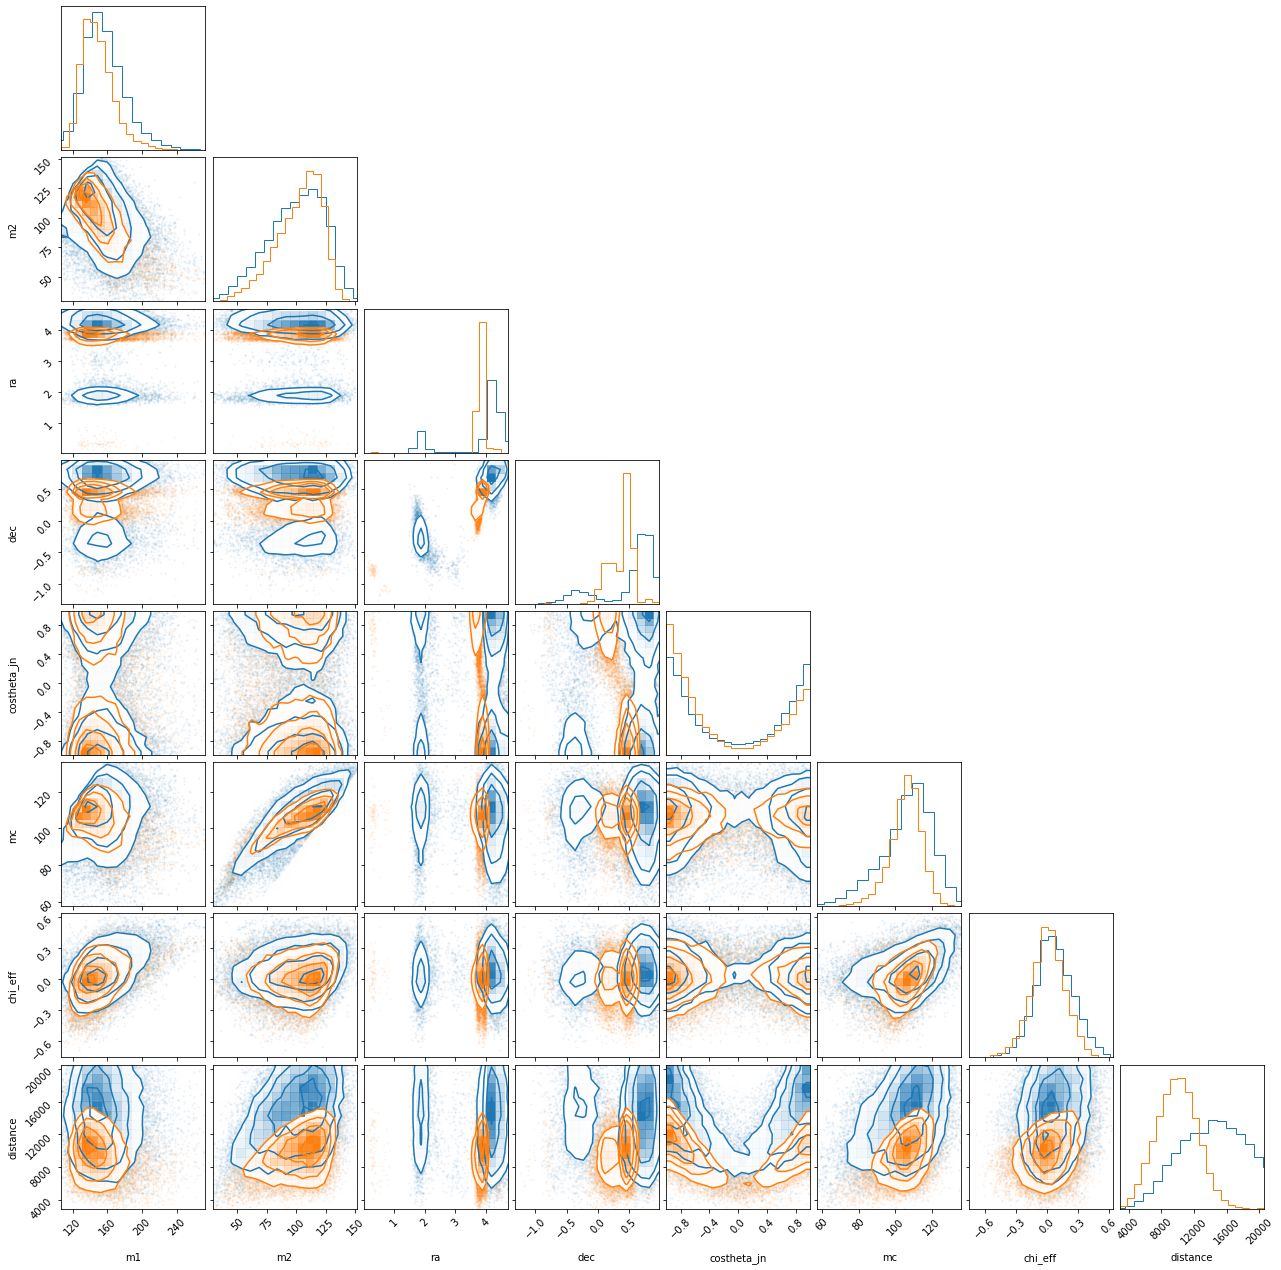

In [18]:
fig = corner.corner(l2_ps_1[params],color = 'C0')
corner.corner(l2_ps_2[params],fig=fig,color='C1')

plt.show()

In [16]:
params = [
    "m1",
    "m2",
    "ra",
    "dec",
    "costheta_jn","mc","chi_eff","dist"]
fig = corner.corner(ul1_ps[params],color = 'C0')
corner.corner(ul2_ps[params],fig=fig,color='C1',weights=np.ones(len(ul2_ps))*len(ul1_ps)/len(ul2_ps))

plt.show()

In [9]:
# List of parameters used for computing Bayesfactor
params = [
    "m1",
    "m2",
    "ra",
    "dec",
    "costheta_jn"]
# Prior ranges for parameter mass_1,mass_2,ra,sin_dec,cos_theta_jn
prior_min = [2.0, 2.0, 0, -1.0, -1.0]
prior_max = [200.0, 200.0, 2 * np.pi, 1, 1]

print("...calculating bayes factors:")
bf = lensing.bayes_factor(l1_ps_1, l1_ps_2)

Blu = bf.calc_blu(params, prior_min, prior_max)
print("Bayes factor B_lu:  %f" % Blu)
print("...done")


...calculating bayes factors:
Bayes factor B_lu:  155.126336
...done


In [58]:
print("...calculating bayes factors:")
bf = lensing.bayes_factor(l2_ps_1, l2_ps_2)

Blu = bf.calc_blu(params, prior_min, prior_max)
print("Bayes factor B_lu:  %f" % Blu)
print("...done")



...calculating bayes factors:
['m1', 'm2', 'costheta_jn']
Bayes factor B_lu:  69.282680
...done


In [60]:
print("...calculating bayes factors:")
bf = lensing.bayes_factor(ul1_ps, ul2_ps)

Blu = bf.calc_blu(params, prior_min, prior_max)
print("Bayes factor B_lu:  %f" % Blu)
print("...done")



...calculating bayes factors:
['m1', 'm2', 'costheta_jn']
Bayes factor B_lu:  0.060875
...done



### Time Delay Prior
$\Delta t = tgps_2 - tgps_1$

$R^L_U = \frac{P(\Delta t|H_L)}{P(\Delta t|H_U)}$

i.e. depends on the expected $\Delta t$ distribution from detectable strongly lensed CBCs, and from the expected $\Delta t$ distribution from the detectable CBC event rates.

In [12]:
lensing.rlu?

Init signature: lensing.rlu(tc_posteriors_1=[], tc_posteriors_2=[], t1=None, t2=0.0)
Docstring:     
This class takes the posterior samples for two events
and calculate bayes factors R_lu (see arXiv:1807.07062)
Input parameters:
tc_posteriors_1: time posterior samples from event 1 after reading from posterior file
tc_posteriors_2: time posterior samples from event 2 after reading from posterior file
t1= GPS time in seconds of first event
t2= GPS time in seconds for the second event
File:           ~/po-tutorial-2022/lensing_utils.py
Type:           type
Subclasses:     


In [10]:
SIE_dt_samples_old = np.genfromtxt("dominik_powerlaw1_delta_t_secs.dat",names=True)['delta_t']

In [20]:
SIE_dt_samples = dict(np.load('SIE_anu.npz'))

In [21]:
SIE_dt_samples.keys()

dict_keys(['mag_0', 'td_0', 'mag_piBy2', 'td_piBy2'])

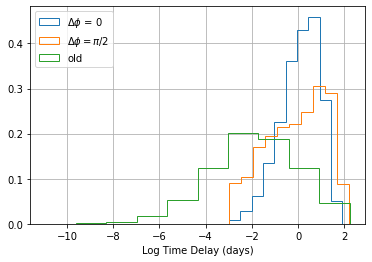

In [22]:
plt.hist(np.log10(SIE_dt_samples['td_0']),histtype='step',label='$\Delta \phi$ = 0 ' ,density=True)
plt.hist(np.log10(SIE_dt_samples['td_piBy2']),histtype='step',label='$\Delta \phi = \pi/2 $',density=True)
plt.hist(np.log10(SIE_dt_samples_old/(24*3600)),histtype='step',label='old',density=True)


plt.legend()
plt.grid()
plt.xlabel('Log Time Delay (days)')
plt.show()

In [23]:
#from scipy.stats import gaussian_kde

#kde_SIE_td_phi0=gaussian_kde(np.log10(SIE_anu['td_0']),bw_method=0.1)
#kde_SIE_td_phi_piBy2=gaussian_kde(np.log10(SIE_anu['td_piBy2']),bw_method=0.1)

In [24]:
tc2=1262198446.21287
tc1=1261764316.403643
rlu=lensing.rlu(
    t1=tc1, t2=tc2)
obs_time = 15811200  # Total O3a observation time


rlu.calc_rlu_dt_samples(SIE_dt_samples['td_piBy2']*24*3600,obs_time)


array([2.19546013])

In [27]:
rlu=lensing.rlu()
obs_time = 15811200  # Total O3a observation time


rlu=lensing.rlu(
    l1_ps_1['t0'], l1_ps_2['t0'])
obs_time = 15811200  # Total O3a observation time


rlu.calc_rlu_dt_samples(SIE_dt_samples['td_piBy2']*24*3600,obs_time)



array([1874.15446722])

In [10]:
#rlu.calc_rlu_pt(t,p_t,obs_time)

## Calculating significance of an event pair (False Alarm Probability)

Background unlensed simulations : BF distribution

Calculate FPP per pair

and then FPP for the catalogue

In [34]:
bg_bfs = pd.read_csv('bg_bayes_factors.txt',delimiter='\t')
bg_bfs

'event1'      'event2'     'blu'  'rlu_haris'  'rlu_anupreeta'
0       b'952_22878'   b'214_4769'  0.000029       0.0194           0.0531
1        b'325_7363'  b'895_21581'  0.000000       0.1430           1.1200
2       b'784_18407'  b'896_21596'  0.000000       0.3570           2.7400
3        b'193_4330'   b'294_6632'  0.000000       0.0540           0.3780
4       b'471_10511'     b'11_223'  0.333000       0.0129           0.0000
...              ...           ...       ...          ...              ...
483675   b'154_3332'   b'287_6478'  0.000000       0.0906           0.7230
483676  b'555_12168'   b'356_8141'  0.000000       0.0358           0.1850
483677   b'204_4567'   b'368_8296'  0.000000       0.6480           4.3400
483678   b'101_2087'   b'113_2381'  0.000000       0.0112           0.0000
483679  b'722_17163'   b'383_8492'  0.000000       0.0182           0.0415

[483680 rows x 5 columns]

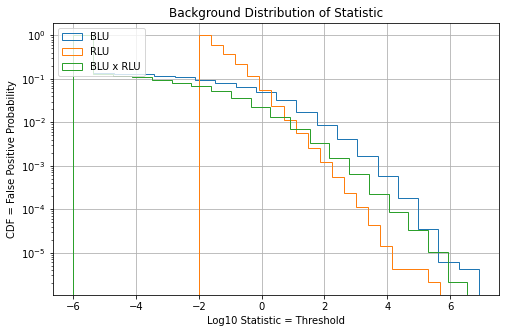

In [85]:
plt.figure(figsize=(8,5))
plt.title('Background Distribution of Statistic')
blu,fpp,fig = plt.hist(np.log10(bg_bfs["'blu'"]+1e-6),20,histtype='step',cumulative = -1,density = True,label='BLU')
plt.hist(np.log10(bg_bfs["'rlu_haris'"]+1e-6),20,histtype='step',cumulative = -1,density = True,label='RLU')
#plt.hist(np.log10(bg_bfs["'rlu_anupreeta'"]+1e-6),20,histtype='step',cumulative = -1,density = True)
plt.hist(np.log10(bg_bfs["'rlu_haris'"]*bg_bfs["'blu'"]+1e-6),20,histtype='step',cumulative = -1,density = True,label='BLU x RLU')
plt.legend()
plt.ylabel('CDF = False Positive Probability')
plt.yscale('log')
plt.xlabel('Log10 Statistic = Threshold')
plt.grid()

In [82]:
np.interp(np.log10(50),fpp[:-1],blu)

0.0095756357275364

# Real events analysis
GWTC-1: Multiple image searches https://iopscience.iop.org/article/10.3847/2041-8213/ab0c0f#apjlab0c0fs3

In [11]:
#!wget https://dcc.ligo.org/public/0157/P1800370/002/GWTC-1_sample_release.tar.gz
#!tar -xvzf GWTC-1_sample_release.tar.gz

In [12]:
file_str = "./GWTC-1_sample_release/GW{}_GWTC-1.hdf5"

events = [
    "150914",
    "151012",
    "151226",
    "170104",
    "170608",
    "170729",
    "170809",
    "170814",
    "170818",
    "170823",
]

posteriors = list()

parameter_translator = dict(
    mass_1="m1_detector_frame_Msun",
    mass_2="m2_detector_frame_Msun",
    ra="right_ascension",
    dec="declination",
    a_1="spin1",
    a_2="spin2",
    cos_tilt_1="costilt1",
    cos_tilt_2="costilt2",
    cos_theta_jn="costheta_jn"
)
def read_posteriors(event):
    posterior = pd.DataFrame()
    #_prior = pd.DataFrame()
    with h5py.File(file_str.format(event)) as ff:
        for my_key, gwtc_key in parameter_translator.items():
            posterior[my_key] = ff["IMRPhenomPv2_posterior"][gwtc_key]
            #_prior[my_key] = ff["prior"][gwtc_key]
    return posterior

In [13]:
#ff=h5py.File(file_str.format(event),'r')
#ff.keys()
#ff['IMRPhenomPv2_posterior'].dtype

In [14]:
# List of parameters used for computing Bayesfactor
params = [
    "mass_1",
    "mass_2",
    "ra",
    "dec",
    "a_1",
    "a_2",
    "cos_tilt_1",
    "cos_tilt_2",
    "cos_theta_jn",
]
# Prior ranges for parameter mass_1,mass_2,ra,sin_dec,a_1,a_2,cos_tilt_1,cos_tilt_2,cos_theta_jn
prior_min = [2.0, 2.0, 0, -1.0, 0, 0, -1.0, -1.0, -1.0]
prior_max = [200.0, 200.0, 2 * np.pi, 1, 1, 1, 1, 1, 1]


In [16]:
ps1,ps2=read_posteriors("150914"),read_posteriors("170809")

print("...calculating bayes factors:")
bf = lensing.bayes_factor(
    ps1, ps2,flatprior = False)

Blu = bf.calc_blu(params, prior_min, prior_max)
print("Bayes factor B_lu:  %f" % Blu)
print("...done")

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37-20210512/lib/python3.7/site-packages/ipykernel_launcher.py:32: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


...calculating bayes factors:
['mass_1', 'mass_2', 'a_1', 'a_2', 'cos_tilt_1', 'cos_tilt_2', 'cos_theta_jn']
Bayes factor B_lu:  0.000000
...done


In [20]:
obs_time_gwtc1 = 714*24*60*60 
rlu=lensing.rlu(t1=1126259462.4,t2=1186302519.8)

rlu.calc_rlu_dt_samples(SIE_dt_samples_old,obs_time_gwtc1)


array([0.00015051])

# Excercises
1. For O3a determine the RLU as a function of time delay between the events.
2. Download the posteriors and calculate the BLU and RLU for any O3a pair.
3. Determine the BLU value corresponding to FPP of 0.01 for O3a run.
4. Get the significance of the pair that you considered in 2.